In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # устанавливаем seaborn как по-умолчанию для отрисовки графиков

In [2]:
train = pd.read_csv('./../first/input/train.csv')
test = pd.read_csv('./../first/input/test.csv')

In [11]:

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


Text(0, 0.5, 'Доля пассажиров')

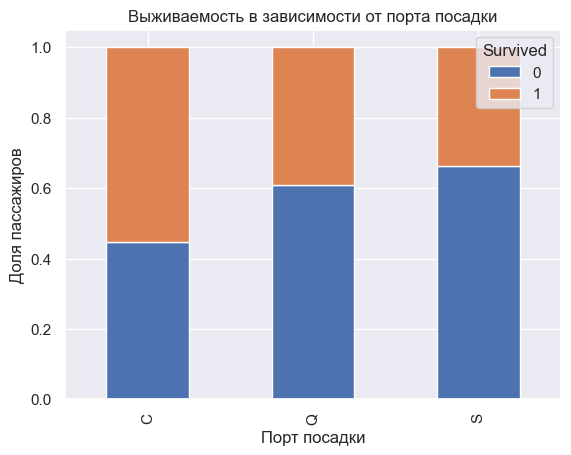

In [14]:
#Самостоятельная рабта

tab =pd.crosstab(train['Embarked'], train['Survived'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Выживаемость в зависимости от порта посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Доля пассажиров')

In [15]:
tab =pd.crosstab(train['Pclass'], train['Embarked'], train['Survived'])
print(tab)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Выживаемость в зависимости от порта посадки и класса')
plt.xlabel('Порт посадки и класс')
plt.ylabel('Доля пассажиров')


ValueError: values cannot be used without an aggfunc.

In [ ]:
tab =pd.crosstab(train['Embarked'], train['Survived'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Выживаемость в зависимости от порта посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Доля пассажиров')

Crosstab для 3 величин (Pclass, Embarked, Survived):
Survived           0   1
Pclass Embarked         
1      C          26  59
       Q           1   1
       S          53  74
2      C           8   9
       Q           1   2
       S          88  76
3      C          41  25
       Q          45  27
       S         286  67

Группированный анализ по классам и портам:
                 Всего  Выжило  Доля_выживших
Pclass Embarked                              
1      C            85      59       0.694118
       Q             2       1       0.500000
       S           127      74       0.582677
2      C            17       9       0.529412
       Q             3       2       0.666667
       S           164      76       0.463415
3      C            66      25       0.378788
       Q            72      27       0.375000
       S           353      67       0.189802


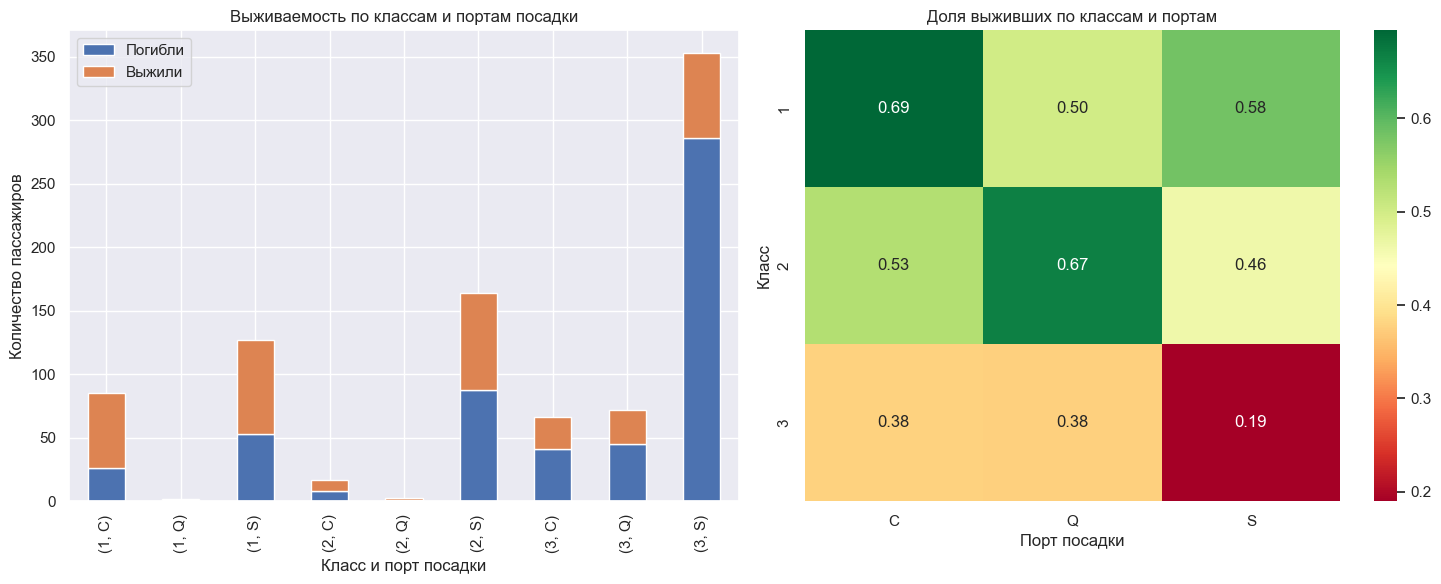

In [18]:
# Crosstab для 3 величин: Pclass, Embarked, Survived
# Способ 1: Многоуровневая таблица
tab3 = pd.crosstab([train['Pclass'], train['Embarked']], train['Survived'])
print("Crosstab для 3 величин (Pclass, Embarked, Survived):")
print(tab3)
print()

# Способ 2: Группированный анализ
print("Группированный анализ по классам и портам:")
grouped = train.groupby(['Pclass', 'Embarked'])['Survived'].agg(['count', 'sum', 'mean'])
grouped.columns = ['Всего', 'Выжило', 'Доля_выживших']
print(grouped)

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Столбчатая диаграмма
tab3.plot(kind='bar', ax=ax1, stacked=True)
ax1.set_title('Выживаемость по классам и портам посадки')
ax1.set_xlabel('Класс и порт посадки')
ax1.set_ylabel('Количество пассажиров')
ax1.legend(['Погибли', 'Выжили'])

# График 2: Тепловая карта долей выживания
survival_rates = grouped['Доля_выживших'].unstack()
sns.heatmap(survival_rates, annot=True, fmt='.2f', cmap='RdYlGn', ax=ax2)
ax2.set_title('Доля выживших по классам и портам')
ax2.set_xlabel('Порт посадки')
ax2.set_ylabel('Класс')

plt.tight_layout()
plt.show()

In [19]:
# Дополнительные способы работы с crosstab для 3 величин

print("=== Способ 3: Crosstab с процентами ===")
# Создаем crosstab с нормализацией
tab_norm = pd.crosstab([train['Pclass'], train['Embarked']], 
                       train['Survived'], 
                       normalize='index')  # нормализация по строкам
print("Доли выживших (по строкам):")
print(tab_norm.round(3))
print()

print("=== Способ 4: Crosstab с margins (итогами) ===")
# Добавляем итоговые строки и столбцы
tab_margins = pd.crosstab([train['Pclass'], train['Embarked']], 
                         train['Survived'], 
                         margins=True)
print("С итогами:")
print(tab_margins)
print()

print("=== Способ 5: Crosstab с дополнительной функцией агрегации ===")
# Используем средний возраст как функцию агрегации
tab_age = pd.crosstab([train['Pclass'], train['Embarked']], 
                     train['Survived'], 
                     values=train['Age'], 
                     aggfunc='mean')
print("Средний возраст по группам:")
print(tab_age.round(1))
print()

print("=== Способ 6: Pivot table (альтернатива crosstab) ===")
# Pivot table для тех же данных
pivot = train.pivot_table(values='Survived', 
                         index=['Pclass', 'Embarked'], 
                         aggfunc=['count', 'sum', 'mean'])
print("Pivot table:")
print(pivot)

=== Способ 3: Crosstab с процентами ===
Доли выживших (по строкам):
Survived             0      1
Pclass Embarked              
1      C         0.306  0.694
       Q         0.500  0.500
       S         0.417  0.583
2      C         0.471  0.529
       Q         0.333  0.667
       S         0.537  0.463
3      C         0.621  0.379
       Q         0.625  0.375
       S         0.810  0.190

=== Способ 4: Crosstab с margins (итогами) ===
С итогами:
Survived           0    1  All
Pclass Embarked               
1      C          26   59   85
       Q           1    1    2
       S          53   74  127
2      C           8    9   17
       Q           1    2    3
       S          88   76  164
3      C          41   25   66
       Q          45   27   72
       S         286   67  353
All              549  340  889

=== Способ 5: Crosstab с дополнительной функцией агрегации ===
Средний возраст по группам:
Survived            0     1
Pclass Embarked            
1      C         43.4  

# Выводы из анализа crosstab для 3 переменных

## Основные находки:

1. **Класс имеет значение**: Пассажиры первого класса имели значительно более высокие шансы на выживание (в среднем ~60-70%), чем пассажиры третьего класса (~19-38%).

2. **Порт посадки влияет на выживаемость**:
   - **Cherbourg (C)**: Лучшие показатели выживаемости во всех классах
   - **Queenstown (Q)**: Средние показатели, но мало данных
   - **Southampton (S)**: Худшие показатели, особенно в 3 классе (19%)

3. **Комбинированный эффект**:
   - Лучшая комбинация: 1 класс + порт C (69.4% выживаемости)
   - Худшая комбинация: 3 класс + порт S (19.0% выживаемости)

4. **Возрастные особенности**: Выжившие пассажиры в среднем были моложе погибших во всех группах.

## Методы работы с crosstab для 3+ переменных:

✅ **Многоуровневые индексы** - основной способ  
✅ **Нормализация** - для получения долей  
✅ **Margins** - для итогов  
✅ **Функции агрегации** - для дополнительных метрик  
✅ **Pivot tables** - альтернативный подход

In [ ]:
tab =pd.crosstab(train['Embarked'], train['Survived'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Выживаемость в зависимости от порта посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Доля пассажиров')